# Desafío 1: Preparación del Ambiente de Trabajo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from cv_error import cv_error, early_stop 
from sklearn.metrics import mean_squared_error, median_absolute_error 

# Desafío 2: Análisis exploratorio

In [3]:
df= pd.read_csv('winequality-red.csv')

Buscamos los tipos de datos del df, son todos float excepto quality que es un entero

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Encontramos los outliers de cada variable utilizando boxplots en primera instancia y luego distplots

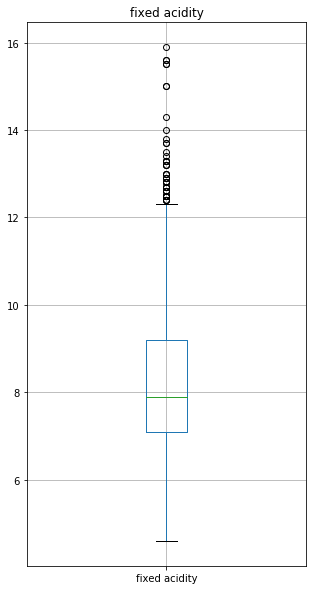

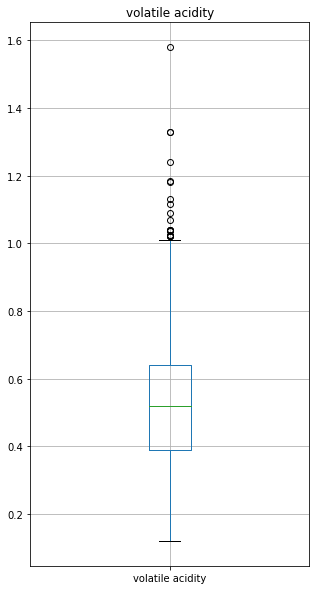

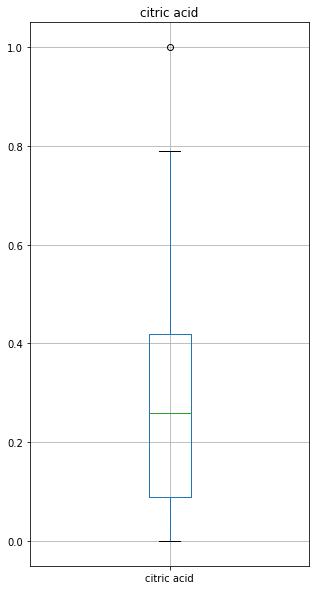

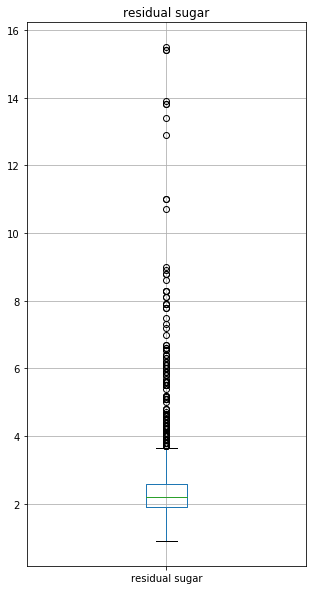

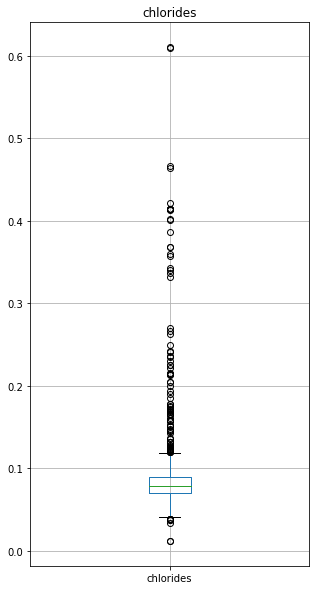

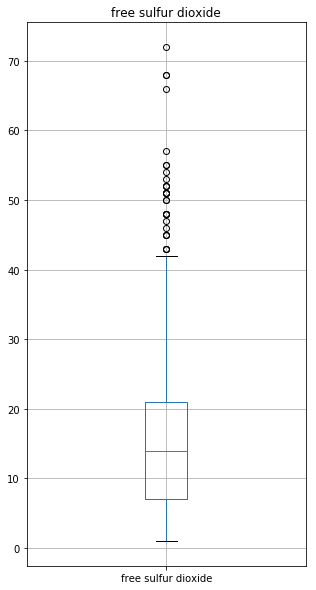

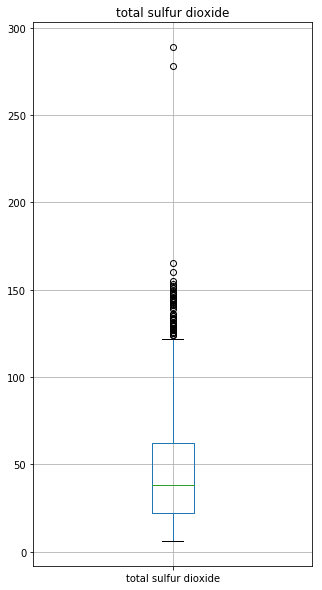

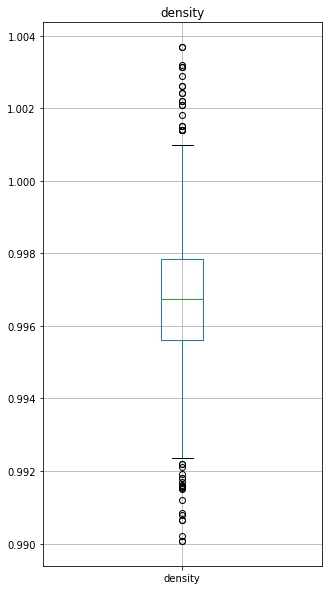

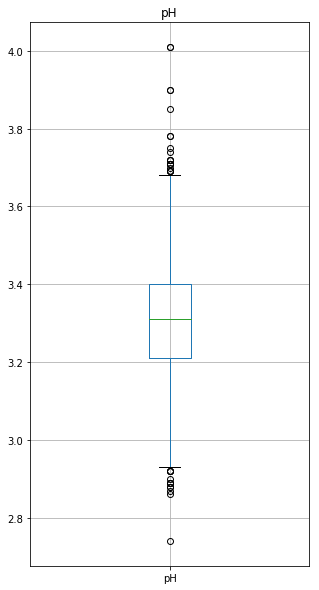

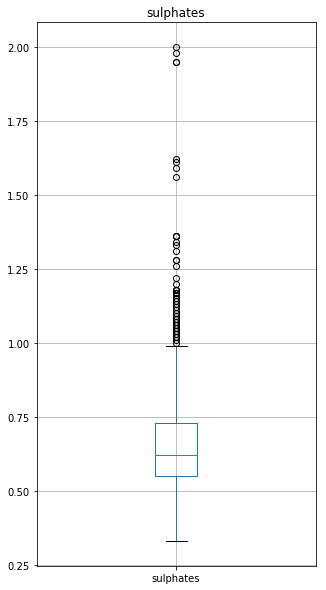

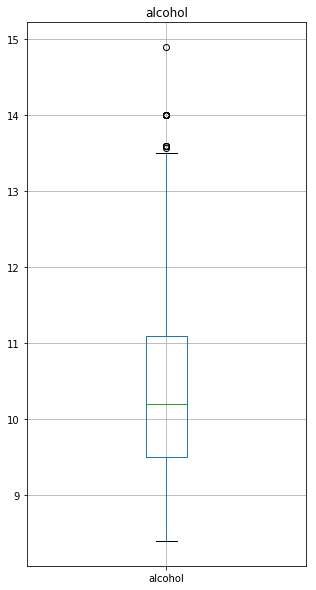

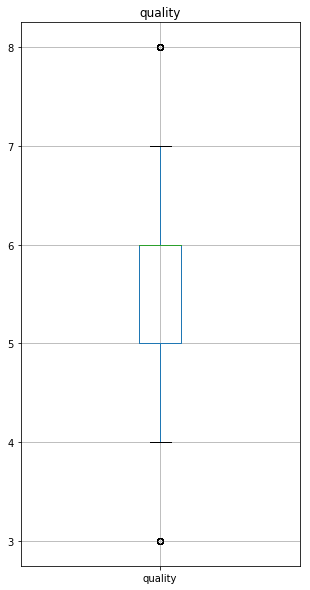

In [5]:
for column in df:
    plt.figure(figsize=(5,10))
    plt.title(column)
    df.boxplot(column)

Solo 'alcohol' tiene pocos outliers, sin embargo 'density' tanto como 'pH' tiene una cantidad similar de outliers en ambas colas,por lo que si se comporta como normal, tiene una alta varianza

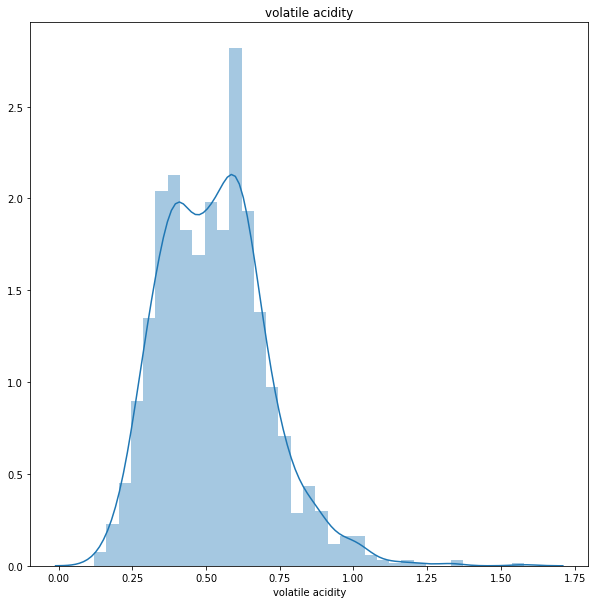

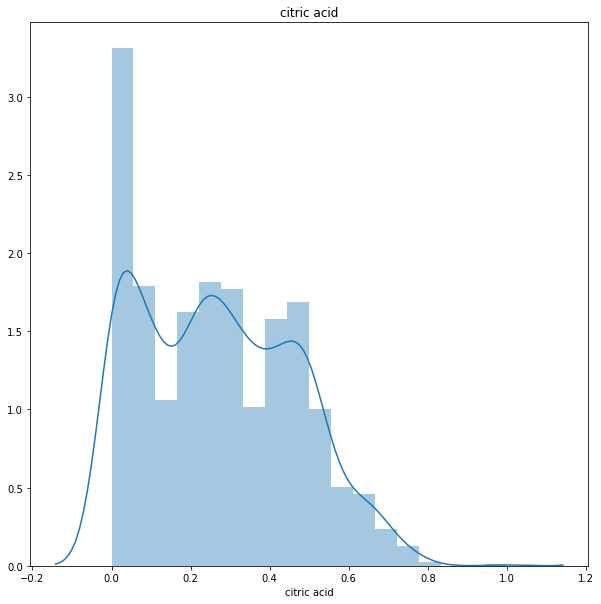

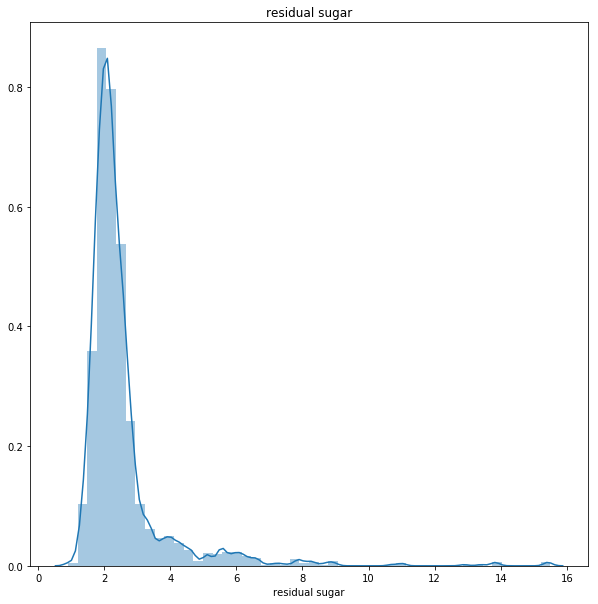

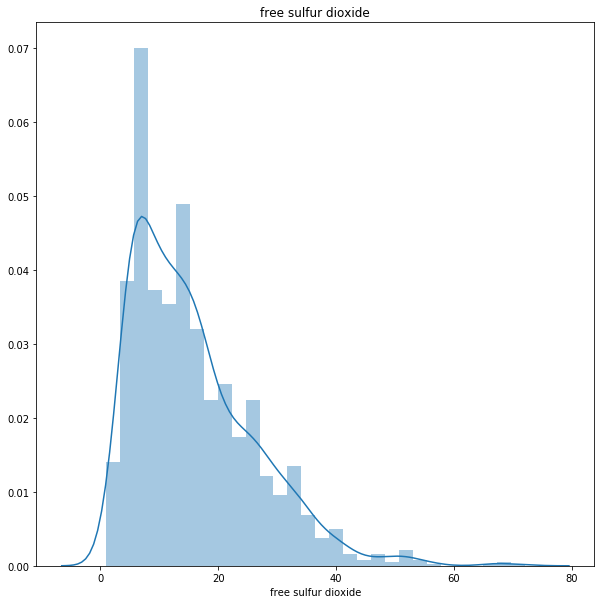

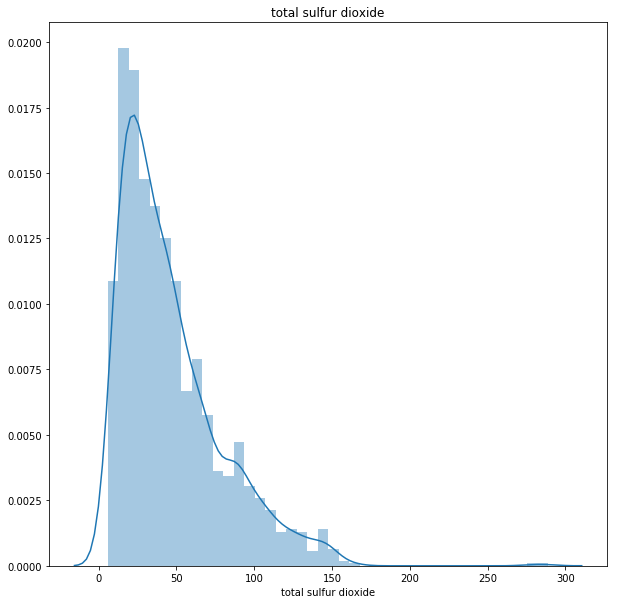

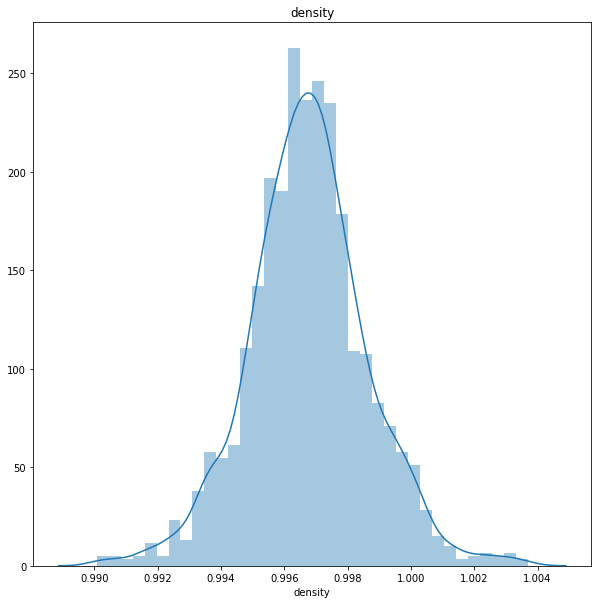

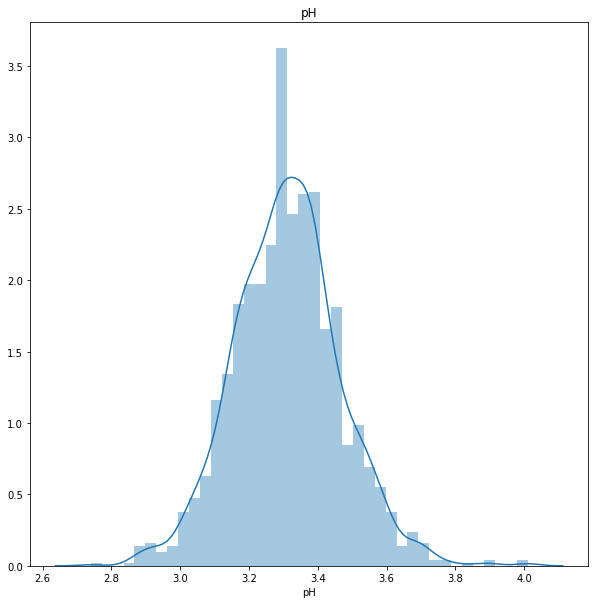

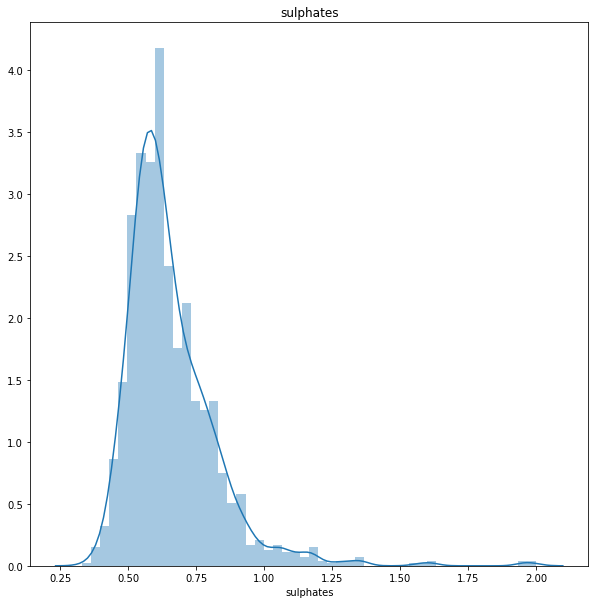

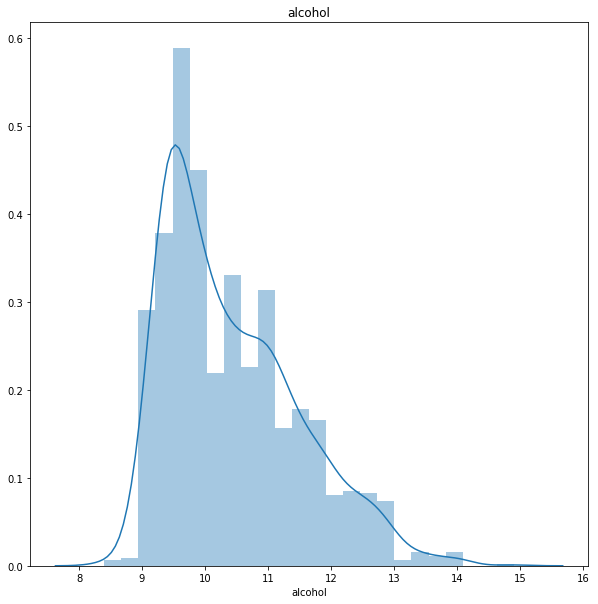

In [6]:
for column in df:
    plt.figure(figsize=(10,10))
    plt.title(column)
    sns.distplot(df[column])

Encontramos outliers entre pares de variables

In [7]:
sns.pairplot(df)

Las variables 'chlorides' y 'residual_sugar' muestra un comportamiento errático  en relación con casi todas las demás variables

# Desafío 3: Regularización de modelos

Genere tres modelos, correspondientes a RidgeCV , LassoCV y ElasticNetCV. Para cada uno de ellos implemente los siguientes pasos:
- Entrene los modelos con 10 validaciones cruzadas.
- Extraiga los coeficientes estimados, el mejor valor alpha, MAE( median_absolute_error ) y RMSE ( mean_squared_error ) asociado a cada modelo.  
En base a la información solicitada, responda lo siguiente:
- ¿Qué modelo presenta un mejor desempeño en base a las métricas?
- ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

In [8]:
# X será nuestro conjunto de atributos. y será nuestra variable objetivo
X = df.iloc[:, :-1] # Tomamos todas las columnas menos la primera (price)
N = X.shape[0] # guardamos el número de filas (datos de entrenamiento)
X.insert(X.shape[1], 'intercept', np.ones(N)) #Se crea una columna nueva dentro de las variables predictoras llamada 'intecept'
y = df['quality'] # asignamos como target la variable 'price'
#Separamos los subsets de test y train
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size = 0.3, random_state = 63)

In [9]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  intercept  
0      9.4        1.0  
1      9.8        1.0  
2      9.8        1.0  
3      9.8        1.0  
4      9.4        1.0

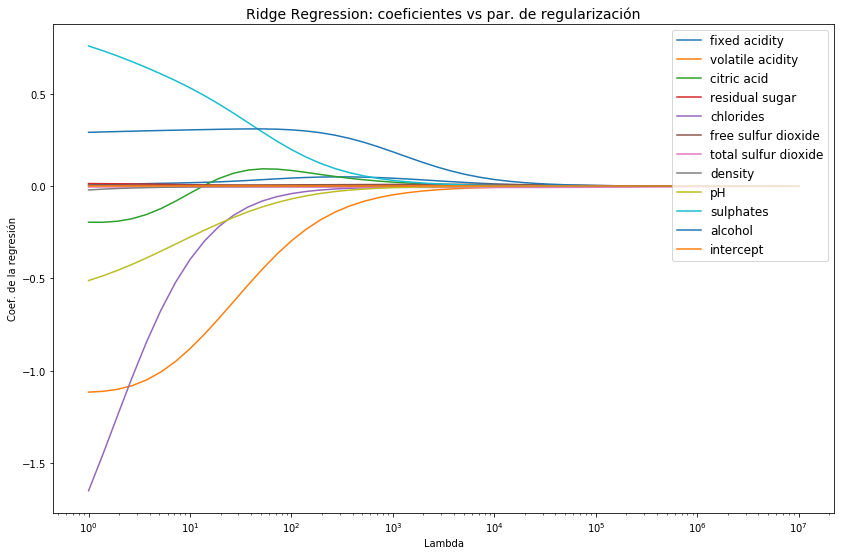

In [10]:
names_regressors = X_train.columns # guardamos los nombres de los atributos
alphas = np.logspace(0, 7, base = 10) # generamos un vector con los valores de la norma
coefs_ridge = [] #lista para guardar parámetros
cv_err_ridge = [] #lista para guardar parámetros
model_ridge = Ridge(fit_intercept = True) # instanciamos el modelo
tol = 0.1 # determinamos el umbral de tolerancia

# para cada valor en el vector
for a in alphas:
    # estimamos el modelo con éste
    model_ridge.set_params(alpha = a)
    model_ridge.fit(X_train, y_train)
    # guardamos el coeficiente estimado
    coefs_ridge.append(model_ridge.coef_)
    # generamos su estimado de validación cruzada
    dummy,cv_err_estimates = cv_error(X_train, y_train, k = 10, method = 'ridge', alpha = a)
    cv_err_ridge.append(np.mean(cv_err_estimates)) # OJO: estamos guardando la media del error de cv para cada alpha


plt.figure(figsize = (14,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas, y_arr, label = label)

plt.legend()
ax.set_xscale("log")
plt.title("Ridge Regression: coeficientes vs par. de regularización", size = 14)
plt.xlabel('Lambda')
plt.ylabel('Coef. de la regresión')
plt.axis("tight")
plt.legend(loc = 1, fontsize = 12);



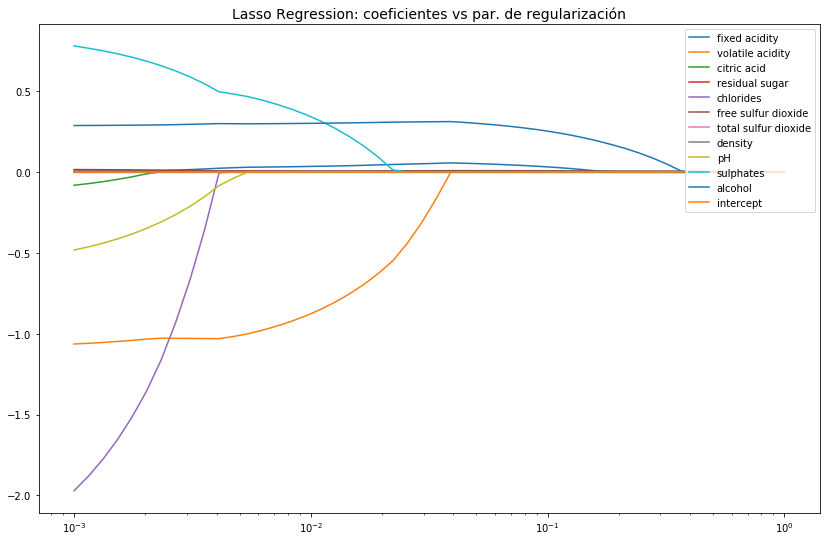

In [11]:


names_regressors = X.columns
alphas_ = np.logspace(0, -3, base = 10)
coefs_lasso = []
cv_err_lasso = []
model_lasso = Lasso(fit_intercept = True)

for a in alphas_:
    model_lasso.set_params(alpha = a)
    model_lasso.fit(X_train, y_train)
    coefs_lasso.append(model_lasso.coef_)
    dummy,cv_err_estimates = cv_error(X_train,y_train,k = 10, method = 'lasso', alpha = a)
    cv_err_lasso.append(np.mean(cv_err_estimates))

plt.figure(figsize = (14,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs_lasso).T, names_regressors):
    plt.plot(alphas_, y_arr, label = label)

plt.legend()
ax.set_xscale("log")

plt.title("Lasso Regression: coeficientes vs par. de regularización", fontsize = 14)
plt.axis("tight")
plt.legend(loc = 1)
plt.show()

In [12]:
ridge_model = RidgeCV(cv=10, fit_intercept=True).fit(X_train,y_train)
lasso_model = LassoCV(cv=10, fit_intercept=True).fit(X_train,y_train)
elastic_model = ElasticNetCV(cv=10, fit_intercept=True).fit(X_train,y_train)

## Lasso

In [13]:
print('Valor del parámetro de regularización: {0}'.format(lasso_model.alpha_))
print('MSE Lasso:',str(mean_squared_error(lasso_model.predict(X_test),y_test)))
print('MAE Lasso:',str(median_absolute_error(lasso_model.predict(X_test),y_test)))

print('Coeficientes finales: \n{0}'.format(lasso_model.coef_))


Valor del parámetro de regularización: 0.0048442596439275745
MSE Lasso: 0.4233035865589868
MAE Lasso: 0.400339592464531
Coeficientes finales: 
[ 0.02617229 -1.01465141 -0.          0.00557413 -0.          0.00513674
 -0.00366347 -0.         -0.03002612  0.47816542  0.29725084  0.        ]


## Ridge

In [14]:
print('Valor del parámetro de regularización: {0}'.format(ridge_model.alpha_))
print('MSE Ridge:',str(mean_squared_error(ridge_model.predict(X_test),y_test)))
print('MAE Ridge:',str(median_absolute_error(ridge_model.predict(X_test),y_test)))

print('Coeficientes finales: \n{0}'.format(ridge_model.coef_))

Valor del parámetro de regularización: 0.1
MSE Ridge: 0.42952107892418284
MAE Ridge: 0.4018269447899052
Coeficientes finales: 
[-1.07708257e-03 -1.09993801e+00 -1.61129254e-01  1.67795777e-02
 -2.43540594e+00  5.00271486e-03 -4.03512401e-03 -1.53620096e-01
 -5.98988505e-01  8.53866648e-01  2.84535250e-01  0.00000000e+00]


## Elastic Net

In [15]:
print('Valor del parámetro de regularización: {0}'.format(elastic_model.alpha_))
print('MSE Ridge:',str(mean_squared_error(elastic_model.predict(X_test),y_test)))
print('MAE Ridge:',str(median_absolute_error(elastic_model.predict(X_test),y_test)))

print('Coeficientes finales: \n{0}'.format(elastic_model.coef_))

Valor del parámetro de regularización: 0.009688519287855149
MSE Ridge: 0.4256535556442817
MAE Ridge: 0.40587456111976294
Coeficientes finales: 
[ 0.03026561 -0.87380999 -0.          0.00451952 -0.          0.00560065
 -0.0037408  -0.         -0.04645546  0.43699937  0.30225262  0.        ]


**Todas las observaciones son consistentes con los gráficos observados**

En base a las métricas, el modelo de Lasso es el mejor, pero por magnitudes muy pequeñas

In [46]:
elastic_coef = elastic_model.coef_
ridge_coef = ridge_model.coef_
lasso_coef = lasso_model.coef_

In [47]:
coeficientes = (pd.DataFrame(elastic_coef).T.append(pd.DataFrame(ridge_coef).T)).append(pd.DataFrame(lasso_coef).T)

coeficientes.columns = X.columns
coeficientes.reset_index(inplace=True, drop='index')
coeficientes['Modelo']=('ElasticNet','Ridge','Lasso')

coeficientes

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.030266         -0.873810    -0.000000        0.004520  -0.000000   
1      -0.001077         -1.099938    -0.161129        0.016780  -2.435406   
2       0.026172         -1.014651    -0.000000        0.005574  -0.000000   

   free sulfur dioxide  total sulfur dioxide  density        pH  sulphates  \
0             0.005601             -0.003741 -0.00000 -0.046455   0.436999   
1             0.005003             -0.004035 -0.15362 -0.598989   0.853867   
2             0.005137             -0.003663 -0.00000 -0.030026   0.478165   

    alcohol  intercept      Modelo  
0  0.302253        0.0  ElasticNet  
1  0.284535        0.0       Ridge  
2  0.297251        0.0       Lasso

- 'fixed acidity' tiene valor tanto positivos como negativos, por lo que es inestable  
- 'volatile acidity' es similar en todos, con una magnitud cercana a -1  
- 'citric acid' es descartado en Lasso y Elastic Net, sin embargo no es descartado en ridge
- 'residual sugar' tiene valores cercanos a 0 en todos  
- 'chlorides' tiene valor bajos en ridge, sin embargo en lasso y elastic net es descartado **(lo que es consistente con el estudio preeliminar de comportamiento de esta variable)**
- 'free sulfur dioxide' tiene coeficientes similares en todos los modelos (0,005)
- 'total sulfor dioxide' es cercano a 0 en todos los modelos
- 'density' es descartadoen todos excepto en Ridge
- 'pH' es cercano a 0 en Elastic Net y Lasso, sin embargo en Ridge tiene un coeficiente de -0.5
- suphates es 0,4 en elastic net y lasso, pero en ridge es 0,8
- alcohol es cercano a 0,3 en todos 
- no hay intercepto en ninguno de los modelos